In [1]:
# Initial set-up

from problema import problema_monedas
import numpy as np
from matplotlib import pyplot as plt
from utils.utils import time_algorithm
import seaborn as sns
import scipy as sp

sns.set_theme()

In [9]:
# Exectute the algorithm with random arrays and measure the time it takes to run


def get_random_array(size):
    return list(np.random.randint(1, 100.000, size))


# Run the algorithm n times, with input sizes from min_size to max_size
min_size = 100
max_size = 1_000_000
n = 50
x = np.linspace(min_size, max_size, n).astype(int)

# Obtain results
results = time_algorithm(problema_monedas, x, lambda s: [get_random_array(s)])

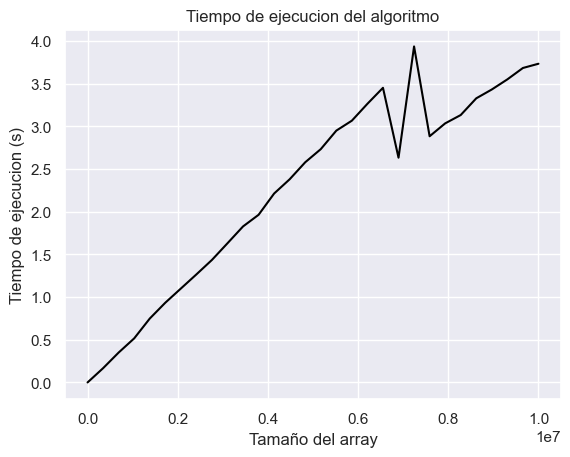

In [10]:
# Plot the results of the executions

fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medicion", color="black")
ax.set_title("Tiempo de ejecucion del algoritmo")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Tiempo de ejecucion (s)")
plt.show()

In [11]:
# Aproximate the function with a lineal, n log(n) and n^2 functions

# Define the functions
f_lineal = lambda x, c1, c2: c1 * x + c2
f_nlogn = lambda x, c1, c2: c1 * x * np.log(x) + c2
f_n2 = lambda x, c1, c2: c1 * x**2 + c2

# Fit the functions
c_lineal, _ = sp.optimize.curve_fit(f_lineal, x, [results[n] for n in x])
c_nlogn, _ = sp.optimize.curve_fit(f_nlogn, x, [results[n] for n in x])
c_n2, _ = sp.optimize.curve_fit(f_n2, x, [results[n] for n in x])

# Print the results
print(f"c_1 lineal: {c_lineal[0]}, c_2 lineal: {c_lineal[1]}")
print(f"c_1 n log(n): {c_nlogn[0]}, c_2 n log(n): {c_nlogn[1]}")
print(f"c_1 n^2: {c_n2[0]}, c_2 n^2: {c_n2[1]}")

c_1 lineal: 3.7214080219356285e-07, c_2 lineal: 0.4035193983445324
c_1 n log(n): 2.2752561284671853e-08, c_2 n log(n): 0.48543205680235524
c_1 n^2: 3.2466977391756726e-14, c_2 n^2: 1.1633397859564913


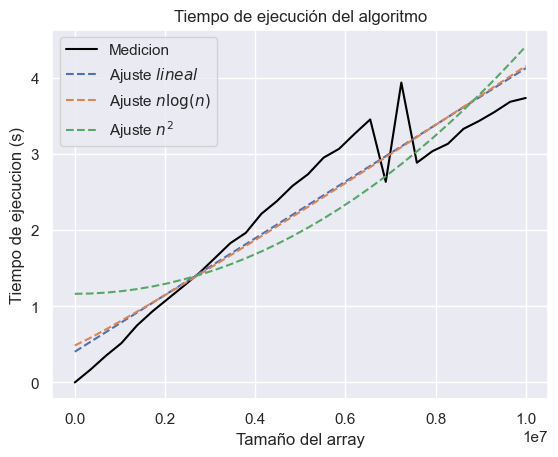

In [12]:
# Plot the results with the adjusted curves

fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medicion", color="black")
ax.plot(x, [f_lineal(n, c_lineal[0], c_lineal[1]) for n in x], "--", label="Ajuste $lineal$")
ax.plot(
    x, [f_nlogn(n, c_nlogn[0], c_nlogn[1]) for n in x], "--", label="Ajuste $n \log(n)$"
)
ax.plot(x, [f_n2(n, c_n2[0], c_n2[1]) for n in x], "--", label="Ajuste $n^2$")
ax.set_title("Tiempo de ejecución del algoritmo")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Tiempo de ejecucion (s)")
ax.legend()
plt.show()

In [13]:
# Cuadratic errors

errors_lineal = [np.abs(f_lineal(n, c_lineal[0], c_lineal[1]) - results[n]) for n in x]
errors_nlogn = [np.abs(f_nlogn(n, c_nlogn[0], c_nlogn[1]) - results[n]) for n in x]
errors_n2 = [np.abs(f_n2(n, c_n2[0], c_n2[1]) - results[n]) for n in x]

print(f"Error cuadrático total ajuste lineal: {np.sum(np.power(errors_lineal, 2))}")
print(f"Error cuadrático total ajuste n log(n): {np.sum(np.power(errors_nlogn, 2))}")
print(f"Error cuadrático total ajuste n^2: {np.sum(np.power(errors_n2, 2))}")

Error cuadrático total ajuste lineal: 3.8731684887262485
Error cuadrático total ajuste n log(n): 4.259081944884726
Error cuadrático total ajuste n^2: 10.711586741666371


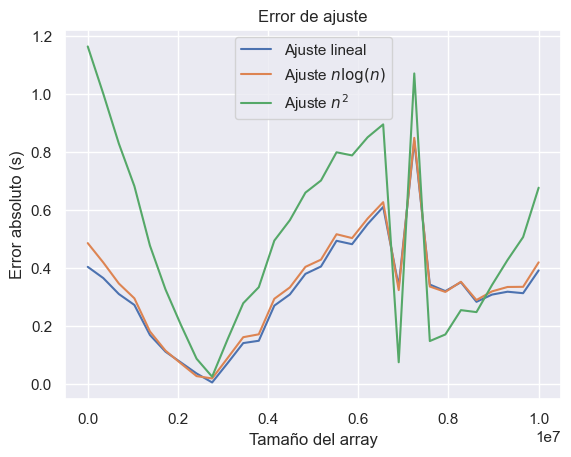

In [14]:
# Plot the errors

fig, ax = plt.subplots()
ax.plot(x, errors_lineal, label="Ajuste lineal")
ax.plot(x, errors_nlogn, label="Ajuste $n \log(n)$")
ax.plot(x, errors_n2, label="Ajuste $n^2$")
ax.set_title("Error de ajuste")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Error absoluto (s)")
ax.legend()
plt.show()